In [87]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [88]:
Stock = 'AMZN'

In [89]:
df_stock = pd.read_csv(r"AMZN.csv", low_memory=False)
print ("Data Shape: ", df_stock.shape)

Data Shape:  (251, 7)


In [90]:
StartDate = df_stock['Date'].min()
EndDate = df_stock['Date'].max()

#### Check for NaN Values

In [91]:
df_stock.isnull().values.any()

False

#### Remove NaN Values if Applicable

In [92]:
df_stock.dropna(axis=1, how='all')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,167.741501,168.110504,163.266006,164.054993,164.054993,53728000
1,2022-04-06,161.650497,162.199997,157.254501,158.755997,158.755997,79056000
2,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000
3,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000
4,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000
...,...,...,...,...,...,...,...
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700


#### Show First Few Columns

In [93]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-05,167.741501,168.110504,163.266006,164.054993,164.054993,53728000
1,2022-04-06,161.650497,162.199997,157.254501,158.755997,158.755997,79056000
2,2022-04-07,158.399994,160.078995,154.511505,157.784500,157.784500,68136000
3,2022-04-08,156.750000,157.368500,154.231003,154.460495,154.460495,46002000
4,2022-04-11,152.712997,154.136505,150.534500,151.121994,151.121994,52112000


#### Show Last Few Columns

In [94]:
df_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
250,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48599900


#### Get Statistics

In [95]:
df_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,111.365902,113.288974,109.302391,111.296480,111.296480,7.359801e+07
std,18.733620,18.903238,18.390732,18.546574,18.546574,3.059969e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,96.035000,97.544998,94.195000,96.259998,96.259998,5.405360e+07
50%,108.199997,112.129997,106.320000,108.859001,108.859001,6.560740e+07
75%,122.549999,124.250000,120.333748,122.384998,122.384998,8.392465e+07
max,167.741501,168.110504,163.266006,164.054993,164.054993,2.726620e+08


### Trading Strategies

In [96]:
df_stock['MidClose'] = df_stock[['Open', 'Close']].mean(axis=1)  

In [97]:
df_stock['SMA30'] = df_stock['MidClose'].rolling(30).mean()  
df_stock['SMA100'] = df_stock['MidClose'].rolling(100).mean()  
df_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MidClose,SMA30,SMA100
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,99.470001,95.904000,94.13990
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400,101.775002,95.959000,94.24880
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300,102.725003,96.093833,94.36370
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700,102.355004,96.255667,94.47485
250,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48599900,103.349998,96.535333,94.60450


Text(0.5, 0, 'Date')

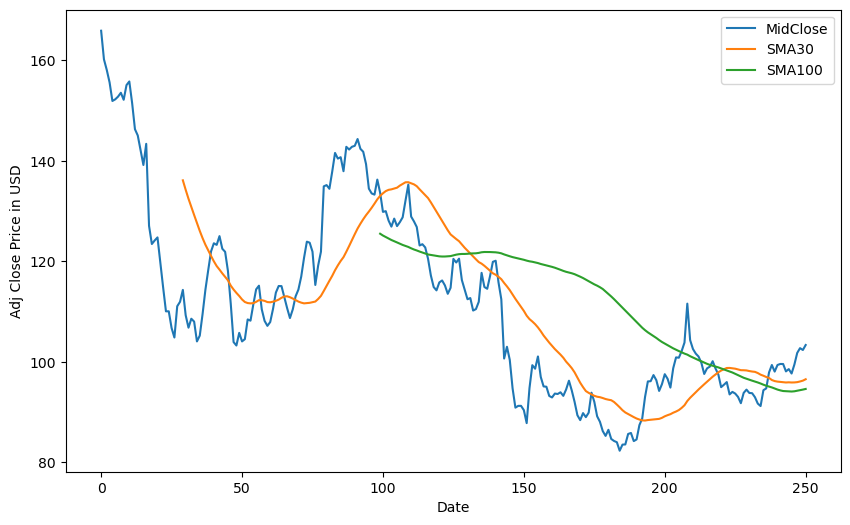

In [99]:
df_stock[['MidClose', 'SMA30', 'SMA100']].plot(figsize=(10, 6))
plt.ylabel("Adj Close Price in USD")
plt.xlabel('Date')

#### Observations:
- 

#### Buy/Sell Function

In [100]:
def buy_sell(data):
    for date in data:
        if df_stock['SMA30'] >  df_stock['SMA100']:
            df_stock['buy_signal_price'] = df_stock[f"{Stock}"]
        if df_stock['SMA30'] <  df_stock['SMA100']:
            df_stock['sell_signal_price'] = df_stock[f"{Stock}"]
    return (signal_price_buy, signal_price_sell)

In [101]:
def buy_sells(data):
    Buy = []
    Sell = []
    flag = -1 

    for date in range(0,len(data)):
        if data['SMA30'][date] > data['SMA100'][date]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(data['MidClose'][date])
                flag = 1
            else:
                Buy.append(np.nan)
        elif data['SMA30'][date] < data['SMA100'][date]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(data['MidClose'][date])
                flag = 0
                
            else:
                Sell.append(np.nan)
            
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return(Buy, Sell)

In [102]:
a = buy_sells(df_stock)
df_stock['Buy_Signal_Price'] = a[0]
df_stock['Sell_Signal_Price'] = a[1]

df_stock.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MidClose,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
246,2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,99.470001,95.904000,94.13990,NaN,NaN
247,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400,101.775002,95.959000,94.24880,NaN,NaN
248,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300,102.725003,96.093833,94.36370,NaN,NaN
249,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700,102.355004,96.255667,94.47485,NaN,NaN
250,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48599900,103.349998,96.535333,94.60450,NaN,NaN


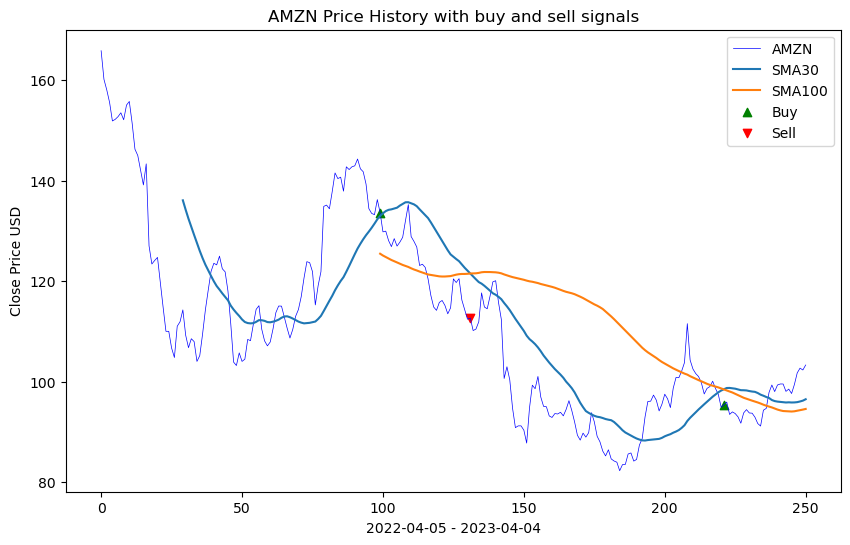

In [115]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_stock['MidClose'] , label = Stock ,linewidth=0.5, color='blue')
ax.plot(df_stock['SMA30'], label = 'SMA30')
ax.plot(df_stock['SMA100'], label = 'SMA100')
ax.scatter(df_stock.index , df_stock['Buy_Signal_Price'] , label = 'Buy' , marker = '^', color = 'green')
ax.scatter(df_stock.index , df_stock['Sell_Signal_Price'] , label = 'Sell' , marker = 'v', color = 'red')
ax.set_title(Stock + " Price History with buy and sell signals")
ax.set_xlabel(f'{StartDate} - {EndDate}')
ax.set_ylabel('Close Price USD')
legend = ax.legend()
plt.show()